In [ ]:
# jeannaej's code starts here

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read the cleaned wine data csv
wine_data = pd.read_csv("wine_data.csv")
wine_data.head()

,Country,Points,Price,Province,Region,Variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
4,US,95,60.0,California,Sonoma Coast,Pinot Noir


In [58]:
# Grouping by country
country_group = wine_data.groupby(["Country"])
points_c_mean = country_group["Points"].mean()
price_c_mean = country_group["Price"].mean()
countries = wine_data["Country"].unique()
countries = sorted(countries)
countries

['Argentina',
 'Australia',
 'Austria',
 'Chile',
 'France',
 'Germany',
 'Italy',
 'New Zealand',
 'Portugal',
 'South Africa',
 'Spain',
 'US']

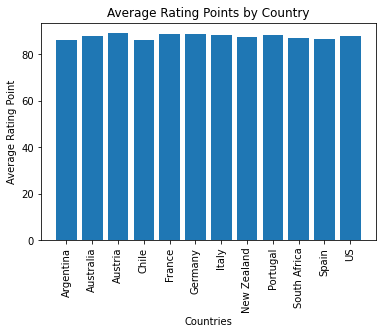

In [59]:
# Creating a bar graph Average rating by country
plt.bar(countries, points_c_mean, align = "center")

plt.title("Average Rating Points by Country")
plt.xlabel("Countries")
plt.ylabel("Average Rating Point")
plt.xticks(rotation = 90)
plt.show()

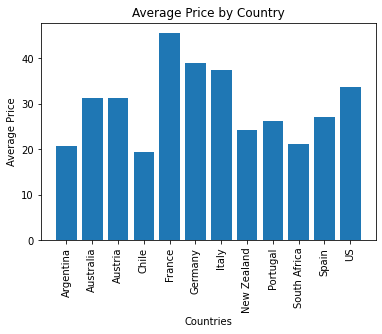

In [60]:
# Creating a bar graph Price by country
plt.bar(countries, price_c_mean, align = "center")

plt.title("Average Price by Country")
plt.xlabel("Countries")
plt.ylabel("Average Price")
plt.xticks(rotation = 90)
plt.show()

In [53]:
# Grouping by country
variety_group = wine_data.groupby(["Variety"])
points_v_mean = variety_group["Points"].mean()
price_v_mean = variety_group["Price"].mean()
varieties = wine_data["Variety"].unique()
varieties = sorted(varieties)
varieties

['Aglianico',
 'Airen',
 'Albana',
 'Albariño',
 'Albarossa',
 'Albarín',
 'Aleatico',
 'Alfrocheiro',
 'Alicante',
 'Alicante Bouschet',
 'Aligoté',
 'Alsace white blend',
 'Altesse',
 'Alvarelhão',
 'Alvarinho',
 'Alvarinho-Chardonnay',
 'Angevine',
 'Ansonica',
 'Antão Vaz',
 'Apple',
 'Aragonez',
 'Aragonês',
 'Arinto',
 'Arneis',
 'Austrian Red Blend',
 'Austrian white blend',
 'Auxerrois',
 'Avesso',
 'Azal',
 'Baco Noir',
 'Baga',
 'Baga-Touriga Nacional',
 'Barbera',
 'Bastardo',
 'Bical',
 'Black Monukka',
 'Black Muscat',
 'Blauburgunder',
 'Blauer Portugieser',
 'Blaufränkisch',
 'Bobal',
 'Bombino Bianco',
 'Bonarda',
 'Bordeaux-style Red Blend',
 'Bordeaux-style White Blend',
 'Bovale',
 'Brachetto',
 'Braucol',
 'Bual',
 'Bukettraube',
 'Cabernet',
 'Cabernet Blend',
 'Cabernet Franc',
 'Cabernet Franc-Cabernet Sauvignon',
 'Cabernet Franc-Carmenère',
 'Cabernet Franc-Malbec',
 'Cabernet Franc-Merlot',
 'Cabernet Franc-Tempranillo',
 'Cabernet Merlot',
 'Cabernet Pfeffer'

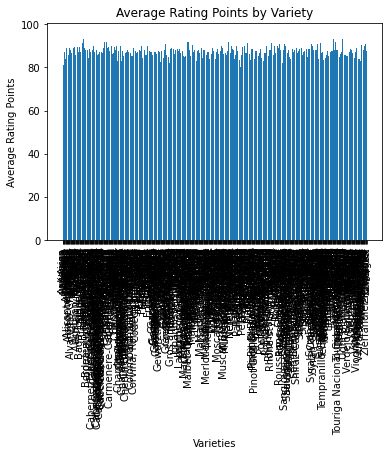

In [55]:
# Creating a bar graph Average points by varietal
plt.bar(varieties, points_v_mean, align = "center")

plt.title("Average Rating Points by Variety")
plt.xlabel("Varieties")
plt.ylabel("Average Rating Points")
plt.xticks(rotation = 90)
plt.show()

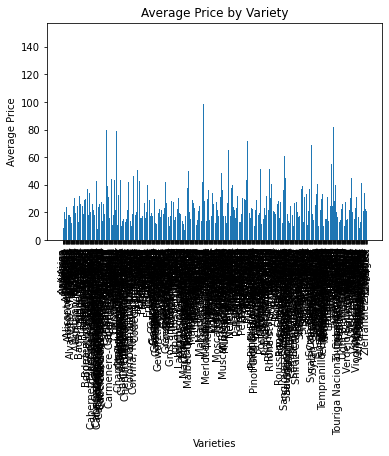

In [56]:
# Creating a bar graph Average Price by varietal
plt.bar(varieties, price_v_mean, align = "center")

plt.title("Average Price by Variety")
plt.xlabel("Varieties")
plt.ylabel("Average Price")
plt.xticks(rotation = 90)
plt.show()

In [67]:
# Getting $40 or more
wine_over_40 = wine_data.loc[wine_data["Price"] >= 40]
wine_over_40

,Country,Points,Price,Province,Region,Variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
4,US,95,60.0,California,Sonoma Coast,Pinot Noir
...,...,...,...,...,...,...
134348,South Africa,87,45.0,Stellenbosch,NaN,Sauvignon Blanc
134352,South Africa,87,48.0,Stellenbosch,NaN,Cabernet Sauvignon
134361,South Africa,85,46.0,Stellenbosch,NaN,Cabernet Sauvignon
134373,South Africa,91,68.0,Paarl,NaN,Shiraz


In [72]:
variety_o40_group = wine_over_40.groupby(["Variety"])
points_v_o40_mean = variety_group["Points"].mean()
price_v_o40_mean = variety_group["Price"].mean()
varieties_o40 = wine_data["Variety"].unique()
varieties_o40 = sorted(varieties)
price_v_o40_mean

Variety
Aglianico                 33.169884
Airen                      8.833333
Albana                    33.933333
Albariño                  19.982987
Albarossa                 40.000000
                            ...    
Zibibbo                   34.258065
Zierfandler               39.500000
Zierfandler-Rotgipfler    22.500000
Zinfandel                 26.776899
Zweigelt                  21.276382
Name: Price, Length: 545, dtype: float64

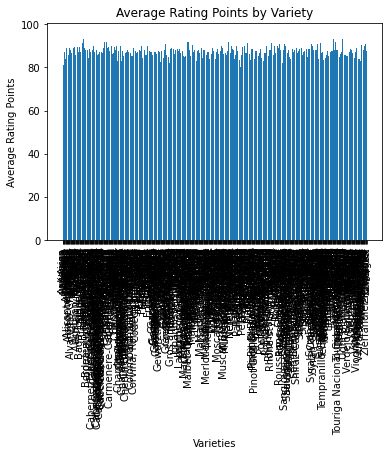

In [73]:
# Creating a bar graph Average points by varietal
plt.bar(varieties_o40, points_v_o40_mean, align = "center")

plt.title("Average Rating Points by Variety")
plt.xlabel("Varieties")
plt.ylabel("Average Rating Points")
plt.xticks(rotation = 90)
plt.show()

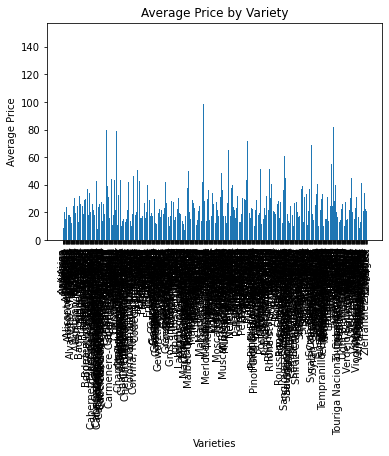

In [75]:
# Creating a bar graph Average Price by varietal
plt.bar(varieties_o40, price_v_o40_mean, align = "center")

plt.title("Average Price by Variety")
plt.xlabel("Varieties")
plt.ylabel("Average Price")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# to do the over $40 need to get the average that is over $40. Think of possibly doing a For Loop?

In [ ]:
# jeannaej's code ends here

In [ ]:
# natalia's code starts here

In [ ]:
# natalia's code ends here

In [ ]:
# sharon's code starts here

In [ ]:
# sharon's code ends here